In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Part 2: Linear Regression (Multivariate Dataset)

In [3]:
#2 load Dataset
dataset="Student_Performance.csv"
data=pd.read_csv(dataset)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
#3 Dataset Information
print("DATASET DESCRIPTION")
print(data.describe()) 
print("--------------")
print("DATASET INFORMATION")
print(data.info())

DATASET DESCRIPTION
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.00000

In [5]:
#5 Preprocessing Data
# Handling of data is not required since there is no missing data
# Converting YES/NO into numbers

data["Extracurricular Activities"]=data["Extracurricular Activities"].map({"Yes": 1, "No": 0})
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
# Correlation Coefficient Matrix
c_r=data.corr()
print(c_r)

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities             0.003873         0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.003873     0.001245   
Previous Scores                                     0.008369     0.005944   
Extracurricular Activities                          1.000000    -0.023284   
Sleep Hours                                        -0.023284     1.000000   
Sample Question Papers Practiced                    0.013103     0.003990   
Performance Index                                   0.024525 

In [7]:
#6 Normalize Dataset
min_max_scaler=MinMaxScaler()
normalize_data=pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
normalize_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1.0,1.0,0.111111,0.900000
1,0.375,0.711864,0.0,0.0,0.222222,0.611111
2,0.875,0.186441,1.0,0.6,0.222222,0.388889
3,0.500,0.203390,1.0,0.2,0.222222,0.288889
4,0.750,0.593220,0.0,0.8,0.555556,0.622222


In [8]:
#8 Split Dataset
features=normalize_data.drop(columns=["Performance Index"])
target=normalize_data["Performance Index"]

#Partition the data into 80(training)/20(testing)
features_train, features_test, target_train, target_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(features_train.describe())
print(features_test.describe())

       Hours Studied  Previous Scores  Extracurricular Activities  \
count    8000.000000      8000.000000                 8000.000000   
mean        0.497906         0.500525                    0.494625   
std         0.324358         0.293962                    0.500002   
min         0.000000         0.000000                    0.000000   
25%         0.250000         0.250000                    0.000000   
50%         0.500000         0.508475                    0.000000   
75%         0.750000         0.762712                    1.000000   
max         1.000000         1.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  
count  8000.000000                       8000.000000  
mean      0.508325                          0.512944  
std       0.339699                          0.317916  
min       0.000000                          0.000000  
25%       0.200000                          0.222222  
50%       0.600000                          0.55

In [9]:
print(target_train.describe())
print(target_test.describe())

count    8000.000000
mean        0.503461
std         0.213356
min         0.000000
25%         0.333333
50%         0.500000
75%         0.677778
max         1.000000
Name: Performance Index, dtype: float64
count    2000.000000
mean        0.498644
std         0.213949
min         0.011111
25%         0.333333
50%         0.500000
75%         0.666667
max         0.988889
Name: Performance Index, dtype: float64


In [10]:
#4 and #7 Train the model using linear regression
#Creating Variable
model=LinearRegression()
model.fit(features_train,target_train)

LinearRegression()

In [11]:
#10 Predict the output for test data
target_prediction=model.predict(features_test)
print(target_prediction)

[0.49679838 0.14017237 0.42114605 ... 0.07548244 0.59270304 0.39936248]


In [12]:
# #9 Confusion Matrix
# #Not Working with regression model
# c_m=confusion_matrix(np.array(target_test),np.array(target_prediction))

In [13]:
#11 Evaluating the Model
#Squared Error
mse=mean_squared_error(target_test,target_prediction)
print("mean squared error: ",mse)

#Absolute Error
mae=mean_absolute_error(target_test,target_prediction)
print("mean absolute error: ",mae)

#R2 Score
r2=r2_score(target_test,target_prediction)
print("r2score: ",r2)

mean squared error:  0.0005040281973483773
mean absolute error:  0.017901348292358944
r2score:  0.9889832909573145


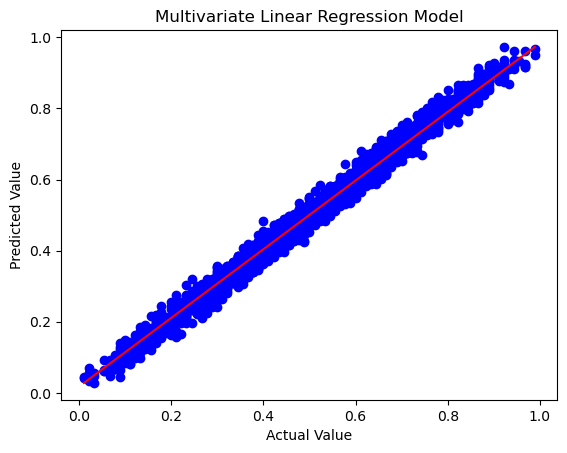

In [14]:
#12 Graphs
#Generating Scatter Plot
plt.scatter(target_test,target_prediction,color="blue",label="Actual VS Predicted")
plt.plot([target_test.min(),target_test.max()],[target_prediction.min(),target_prediction.max()],color="red")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Multivariate Linear Regression Model")
plt.show()

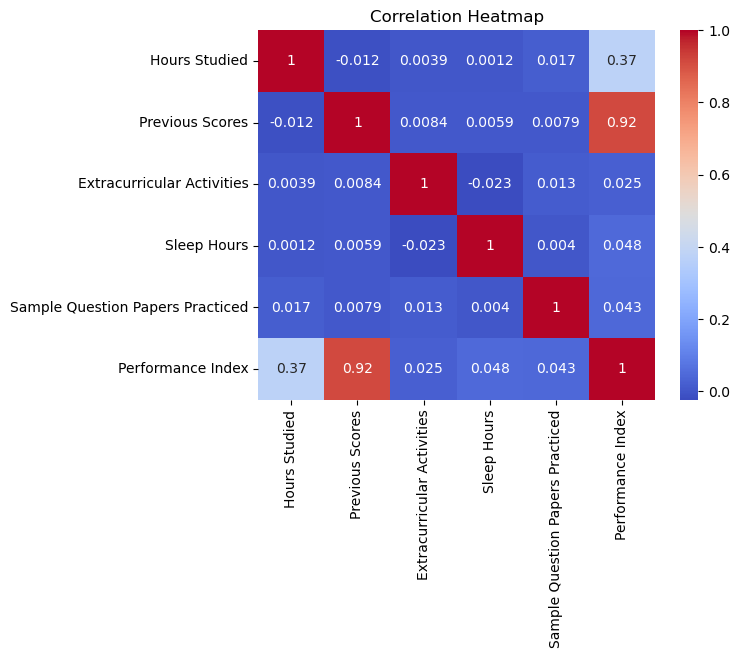

In [15]:
#Graph Correlation Heatmap
plt.figure()
sns.heatmap(c_r,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

6252   -0.041243
4684   -0.029061
1731   -0.021146
4742   -0.036553
4521   -0.022273
          ...   
6412   -0.020959
8285    0.036689
7853   -0.008816
1095    0.018408
6929    0.011749
Name: Performance Index, Length: 2000, dtype: float64


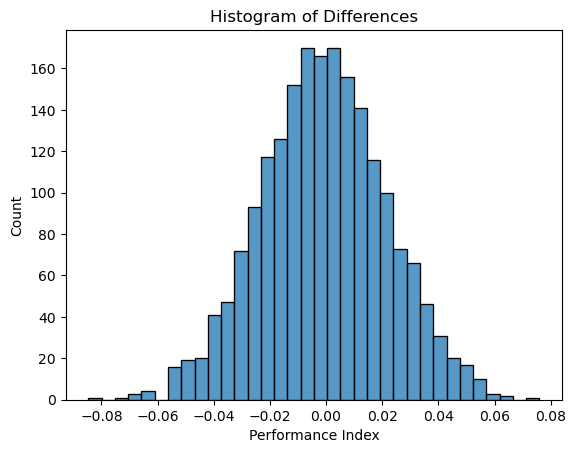

In [16]:
#Graph Histogram
diff=target_test-target_prediction
print(diff)

plt.figure()
sns.histplot(diff)
plt.title("Histogram of Differences")
plt.show()

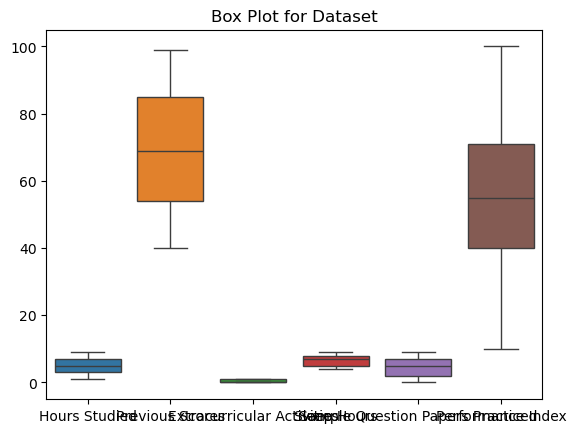

In [17]:
#Graph Box Plot for Dataset
plt.figure()
sns.boxplot(data)
plt.title("Box Plot for Dataset")
plt.show()